Test accuracy with Sigmoid: 0.9673


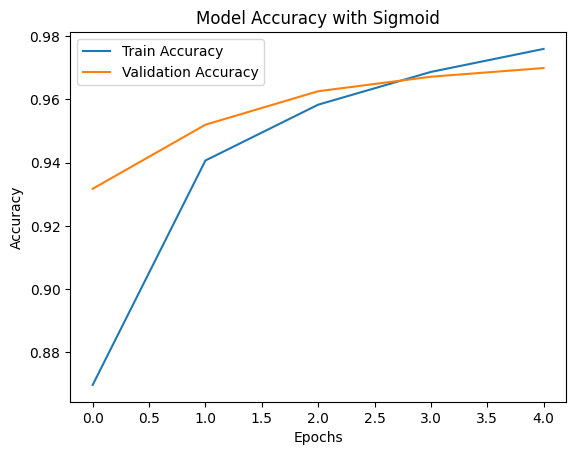

Test accuracy with Tanh: 0.9716


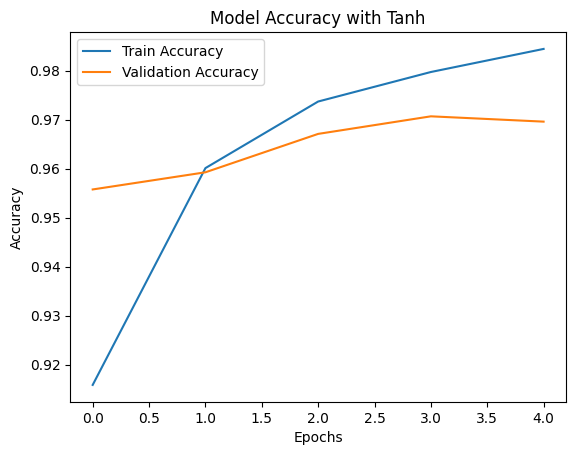

Test accuracy with ReLU: 0.9736


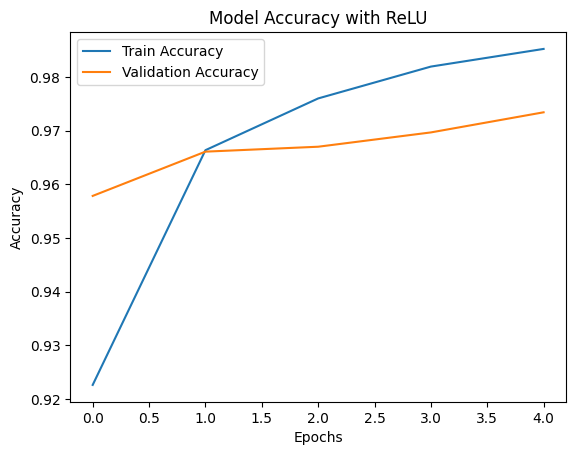

Test accuracy with Softmax (Hidden Layers): 0.8562


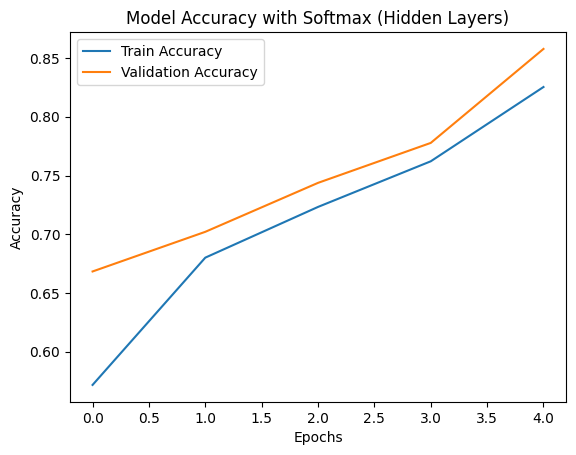

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Define a function to create and train a model with a given activation function
def train_model(activation_function, title):
    model = Sequential([
        Input(shape=(28, 28)),  # Use Input layer to specify input shape
        Flatten(),
        Dense(128, activation=activation_function),
        Dense(64, activation=activation_function),
        Dense(10, activation='softmax')  # Output layer uses softmax
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"Test accuracy with {title}: {test_acc:.4f}")

    # Plot accuracy
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy with {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Train and evaluate models with different activation functions
activation_functions = {
    'Sigmoid': 'sigmoid',
    'Tanh': 'tanh',
    'ReLU': 'relu',
    'Softmax (Hidden Layers)': 'softmax'
}

for title, activation_function in activation_functions.items():
    train_model(activation_function, title)
